In [14]:
import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

In [3]:
img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
example_image = download_image(example_url).resize((512, 512))

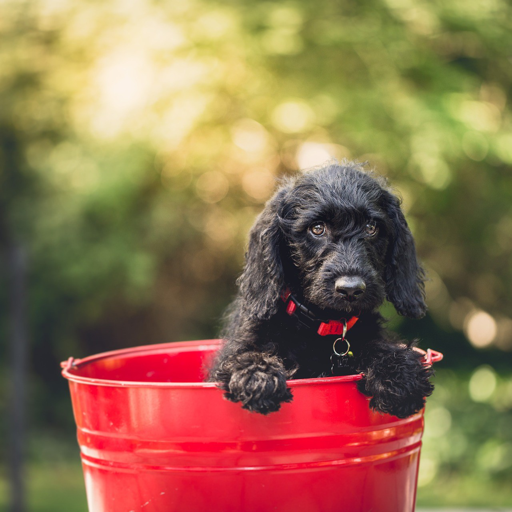

In [5]:
init_image

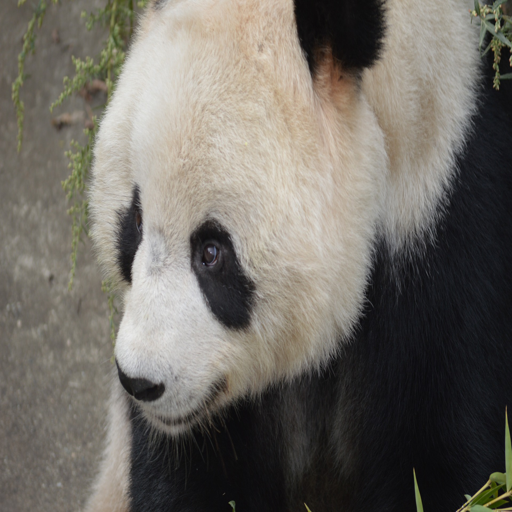

In [6]:
example_image

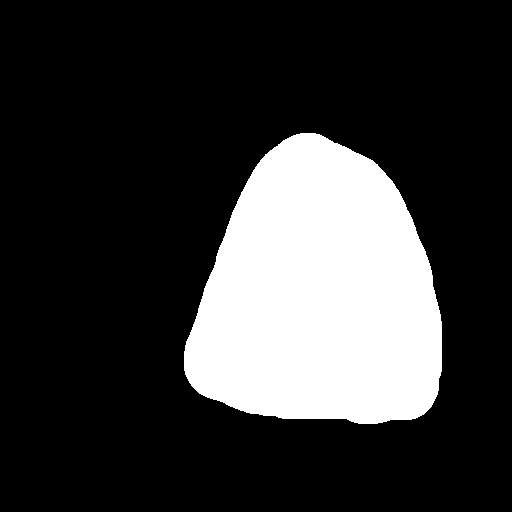

In [7]:
mask_image

In [8]:
pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)

image_encoder/model.safetensors not found


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


In [9]:
pipe.enable_sequential_cpu_offload()

  0%|          | 0/50 [00:00<?, ?it/s]

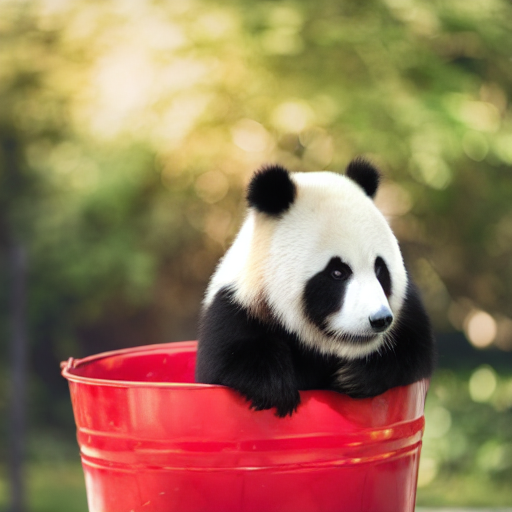

In [10]:
image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

In [13]:
np.asarray(mask_image).shape

(512, 512, 3)

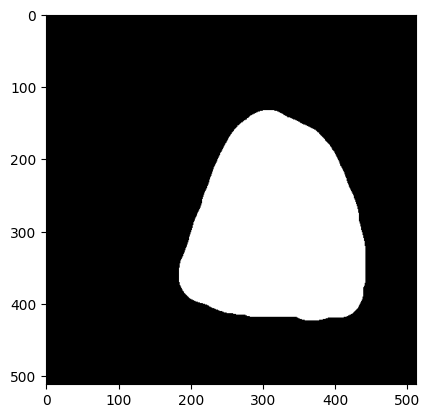

In [15]:
plt.imshow(np.asarray(mask_image))

In [16]:
np.unique(np.asarray(mask_image))

array([  0, 255], dtype=uint8)

In [19]:
np.unique(np.asarray(mask_image)[:, :, 0]), np.unique(np.asarray(mask_image)[:, :, 1]), np.unique(np.asarray(mask_image)[:, :, 2])

(array([  0, 255], dtype=uint8),
 array([  0, 255], dtype=uint8),
 array([  0, 255], dtype=uint8))

In [22]:
np.unique(np.asarray(mask_image)[:, :, 0] == np.asarray(mask_image)[:, :, 2])

array([ True])